# S&P/TSX 60 Factor Analysis

In [1]:
## get ticker list from wiki and file is saved
import numpy as np
import datetime as dt
import pandas as pd
import pandas_datareader as web
csv_file = np.genfromtxt('TSX 60 stoxx prediction/Data.csv', 
                          delimiter=',', dtype=str)
tickers_TSX60 = csv_file[:].tolist()


In [2]:
## we will get price information from yahoo finance using pandas_datareader
def get_YahooData(tickers_TSX60):
    t0=dt.datetime(2000,1,1)
    T=dt.datetime(2020,12,31)
    
    f_yh=web.DataReader(tickers_TSX60,'yahoo',t0,T)
    f_yh=pd.DataFrame(f_yh)
    f_yh.to_csv('TSX60_yahooData_Dec2020.csv')
    return f_yh

In [3]:
YahooData_d=get_YahooData(tickers_TSX60)

C:\Users\muskan\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'ATD.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\muskan\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'ABX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\muskan\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BAM.A', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\muskan\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BIP.UN', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\muskan\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BPY.UN', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\muskan\anaconda3\lib\site-packages\pandas

In [20]:
## lets take a look at the data
YahooData_d.describe()

Attributes    Adj Close                                                      \
Symbols             AEM          AQN          BCE          BMO          BNS   
count       5285.000000  2772.000000  5285.000000  5285.000000  5285.000000   
mean          32.661873     6.968422    22.345900    37.128141    28.645269   
std           18.348946     3.235257    11.694158    19.248465    14.852336   
min            4.100954     2.371403     5.739711     5.825497     3.926145   
25%           12.364507     4.539341    10.865020    21.105598    15.604504   
50%           32.741318     5.956447    20.269901    37.156246    29.963190   
75%           46.224281     8.899853    32.829025    51.962597    39.924622   
max           84.552933    16.177288    44.965061    75.081650    55.621113   

Attributes                                                                   \
Symbols             BHC          CCO           CM          CNR          CNQ   
count       5285.000000  3809.000000  5285.000000  5285.000000  5139.000000   
mean          38.481212     3.998333    42.802663    71.832090    18.918120   
std           45.608660     1.638049    21.246733    81.537924     9.544122   
min            6.335333     0.430000     8.065735     2.990000     1.947874   
25%           14.290337     2.883157    24.554607    12.060000    12.626440   
50%           21.341454     3.898652    44.063953    17.790001    22.303389   
75%           35.529999     5.143243    59.537663   108.849998    25.702569   
max          262.519989     7.919636    85.440300   336.600006    38.427364   

Attributes  ... Volume                                                    
Symbols     ... CAR.UN CTC.A WEED   WN  MRU  POW RCI.B  SNC SJR.B TECK.B  
count       ...    0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0    0.0  
mean        ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
std         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
min         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
25%         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
50%         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
75%         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
max         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  

[8 rows x 360 columns]

In [21]:
YahooData_d.shape

(5285, 360)

In [22]:
YahooData_d.head()

Attributes Adj Close                                                   \
Symbols          AEM AQN       BCE       BMO       BNS        BHC CCO   
Date                                                                    
1999-12-31  6.239902 NaN  7.500875  6.682190  4.786912  15.723070 NaN   
2000-01-03  6.030155 NaN  7.511269  6.559803  4.786912  15.188486 NaN   
2000-01-04  5.872846 NaN  7.121410  6.388467  4.786912  14.926439 NaN   
2000-01-05  5.820411 NaN  6.856307  6.363989  4.786912  14.821615 NaN   
2000-01-06  5.925282 NaN  6.502834  6.363989  4.716643  14.591008 NaN   

Attributes                         ... Volume                               \
Symbols           CM      CNR CNQ  ... CAR.UN CTC.A WEED  WN MRU POW RCI.B   
Date                               ...                                       
1999-12-31  8.561394  92.5000 NaN  ...    NaN   NaN  NaN NaN NaN NaN   NaN   
2000-01-03  8.291034  91.8750 NaN  ...    NaN   NaN  NaN NaN NaN NaN   NaN   
2000-01-04  8.291034  89.0625 NaN  ...    NaN   NaN  NaN NaN NaN NaN   NaN   
2000-01-05  8.426214  85.0000 NaN  ...    NaN   NaN  NaN NaN NaN NaN   NaN   
2000-01-06  8.336095  84.0625 NaN  ...    NaN   NaN  NaN NaN NaN NaN   NaN   

Attributes                   
Symbols    SNC SJR.B TECK.B  
Date                         
1999-12-31 NaN   NaN    NaN  
2000-01-03 NaN   NaN    NaN  
2000-01-04 NaN   NaN    NaN  
2000-01-05 NaN   NaN    NaN  
2000-01-06 NaN   NaN    NaN  

[5 rows x 360 columns]

In [23]:
YahooData_d.describe()

Attributes    Adj Close                                                      \
Symbols             AEM          AQN          BCE          BMO          BNS   
count       5285.000000  2772.000000  5285.000000  5285.000000  5285.000000   
mean          32.661873     6.968422    22.345900    37.128141    28.645269   
std           18.348946     3.235257    11.694158    19.248465    14.852336   
min            4.100954     2.371403     5.739711     5.825497     3.926145   
25%           12.364507     4.539341    10.865020    21.105598    15.604504   
50%           32.741318     5.956447    20.269901    37.156246    29.963190   
75%           46.224281     8.899853    32.829025    51.962597    39.924622   
max           84.552933    16.177288    44.965061    75.081650    55.621113   

Attributes                                                                   \
Symbols             BHC          CCO           CM          CNR          CNQ   
count       5285.000000  3809.000000  5285.000000  5285.000000  5139.000000   
mean          38.481212     3.998333    42.802663    71.832090    18.918120   
std           45.608660     1.638049    21.246733    81.537924     9.544122   
min            6.335333     0.430000     8.065735     2.990000     1.947874   
25%           14.290337     2.883157    24.554607    12.060000    12.626440   
50%           21.341454     3.898652    44.063953    17.790001    22.303389   
75%           35.529999     5.143243    59.537663   108.849998    25.702569   
max          262.519989     7.919636    85.440300   336.600006    38.427364   

Attributes  ... Volume                                                    
Symbols     ... CAR.UN CTC.A WEED   WN  MRU  POW RCI.B  SNC SJR.B TECK.B  
count       ...    0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0    0.0  
mean        ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
std         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
min         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
25%         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
50%         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
75%         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  
max         ...    NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN    NaN  

[8 rows x 360 columns]

In [4]:
## now we will clean the data, we will just use the adj close price and we will delete the volume data
## also we will delete tickers which has more then 100 nan's, these might have started trading late
def Get_AdjPrice_cleaned(YahooData_d):
    P_TSX60_d=YahooData_d['Adj Close']
    
    P_TSX60_d_s=P_TSX60_d.dropna(axis=1, thresh=(P_TSX60_d.shape[0]-100))
    P_TSX60_d_s=P_TSX60_d_s.interpolate(method='linear',limit_direction='forward')
    return P_TSX60_d_s

In [7]:
P_TSX60_d_cleaned=Get_AdjPrice_cleaned(YahooData_d)
print(P_TSX60_d_cleaned)

Symbols           AEM        BCE        BMO        BNS        BHC         CM  \
Date                                                                           
1999-12-31   6.239902   7.500875   6.682190   4.786912  15.723070   8.561394   
2000-01-03   6.030155   7.511269   6.559803   4.786912  15.188486   8.291034   
2000-01-04   5.872846   7.121410   6.388467   4.786912  14.926439   8.291034   
2000-01-05   5.820411   6.856307   6.363989   4.786912  14.821615   8.426214   
2000-01-06   5.925282   6.502834   6.363989   4.716643  14.591008   8.336095   
...               ...        ...        ...        ...        ...        ...   
2020-12-24  70.284904  41.513092  73.778244  51.603710  20.270000  85.440300   
2020-12-28  69.547539  41.406303  73.787971  51.651951  19.860001  83.766914   
2020-12-29  69.980133  41.445133  73.710205  51.738773  19.910000  83.688629   
2020-12-30  70.914108  41.532509  73.612999  52.008900  20.059999  83.561417   
2020-12-31  69.321419  41.551926  73.904

In [27]:
P_TSX60_d_cleaned.head()

Symbols,AEM,BCE,BMO,BNS,BHC,CM,CNR,CP,CSU,ENB,...,OTEX,PPL,RY,SAP,SLF,SU,TRP,T,TD,WCN
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,6.239902,7.500875,6.682190,4.786912,15.723070,8.561394,92.5000,1.545982,75.9375,2.050588,...,1.965844,4.185071,4.709229,39.567757,NaN,3.551687,3.064901,16.237543,5.886250,2.582750
2000-01-03,6.030155,7.511269,6.559803,4.786912,15.188486,8.291034,91.8750,1.496692,78.7500,1.999641,...,2.020450,4.059291,4.562482,38.997749,NaN,3.487884,3.086793,15.654655,5.749997,2.593931
2000-01-04,5.872846,7.121410,6.388467,4.786912,14.926439,8.291034,89.0625,1.505654,79.6875,1.980537,...,2.006799,4.162201,4.555814,35.530231,NaN,3.604856,3.043008,14.738697,5.695492,2.448583
2000-01-05,5.820411,6.856307,6.363989,4.786912,14.821615,8.426214,85.0000,1.545982,78.7500,2.012378,...,2.027277,4.253681,4.529132,34.247723,NaN,3.913239,3.043008,14.967692,5.531985,2.403859
2000-01-06,5.925282,6.502834,6.363989,4.716643,14.591008,8.336095,84.0625,1.622162,79.6875,2.037852,...,2.122839,4.196507,4.569154,34.105217,NaN,3.806896,3.043008,14.651713,5.409355,2.280871


In [8]:
P_d=P_TSX60_d_cleaned.to_csv('P_TSX60_d_cleaned_Nov2020.csv')

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
P_d=pd.read_csv('P_TSX60_d_cleaned_Dec2020.csv',parse_dates=True,index_col=0)

AEM


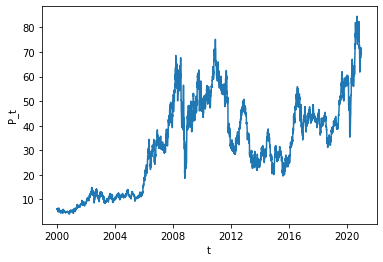

BCE


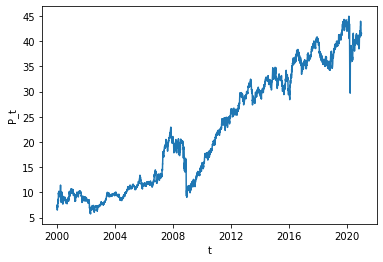

BMO


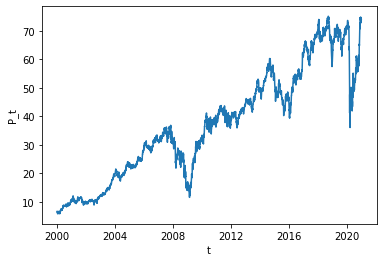

BNS


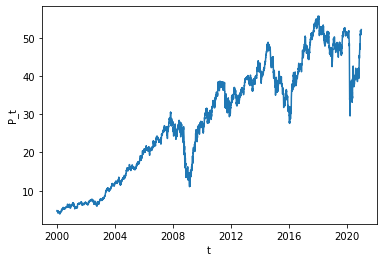

BHC


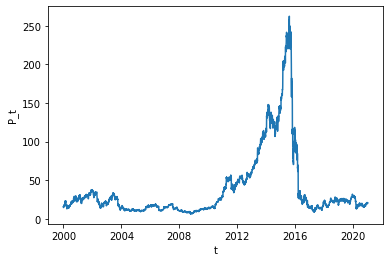

CM


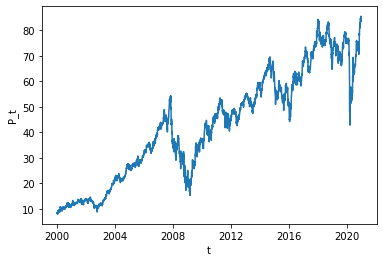

CNR


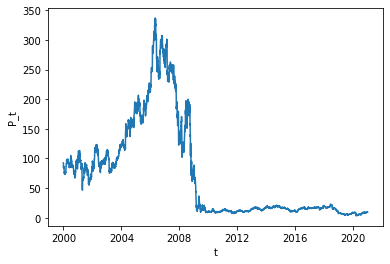

CP


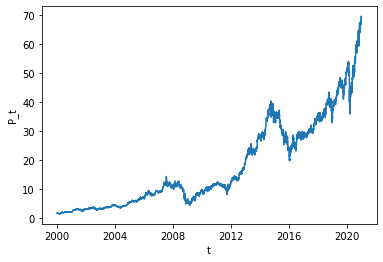

CSU


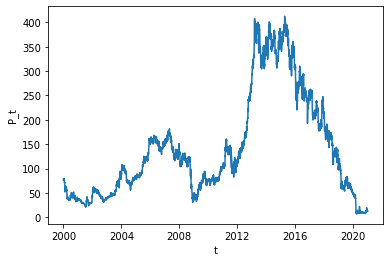

ENB


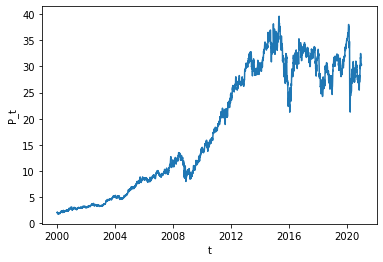

GIL


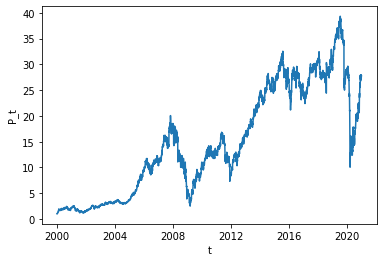

IMO


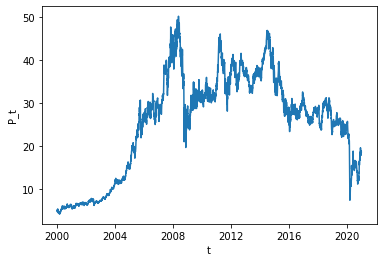

K


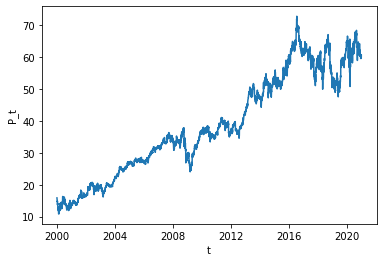

L


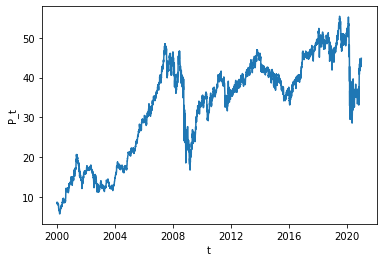

MFC


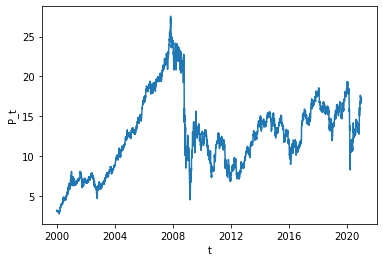

OTEX


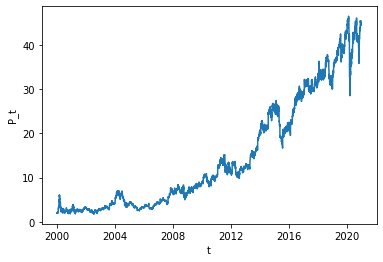

PPL


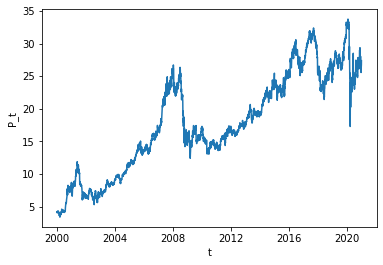

RY


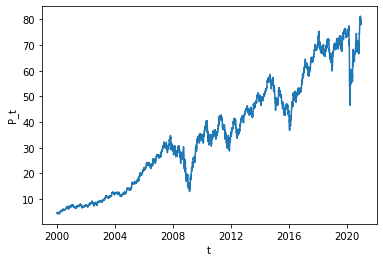

SAP


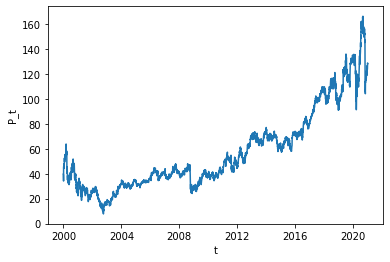

SLF


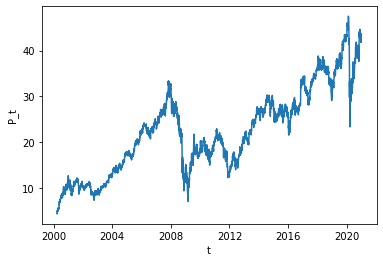

SU


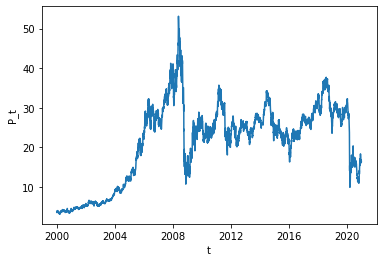

TRP


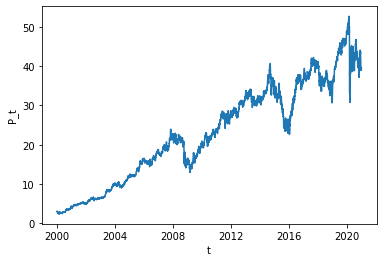

T


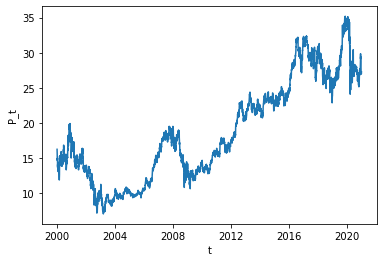

TD


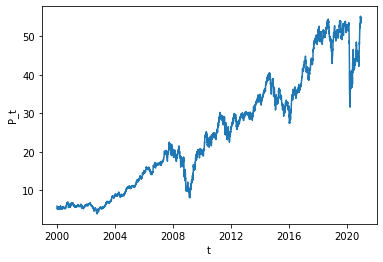

WCN


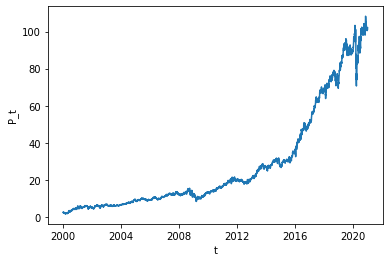

In [3]:
##lets plot this data to analyse
for i in range(0,P_d.shape[1]):
     print(P_d.columns[i])
     plt.figure
     plt.plot(P_d.index,P_d.iloc[:,i])
     plt.xlabel('t')
     plt.ylabel('P_t')
     plt.axis('tight')
     plt.show()

In [3]:
## In most of the charts we can see the impact of financial crisis of 2008 and effect of covid in 2020
#daily return
r_d=np.log(P_d/P_d.shift())
r_d=r_d.dropna()
r_d.head(2)

,AEM,BCE,BMO,BNS,BHC,CM,CNR,CP,CSU,ENB,...,OTEX,PPL,RY,SAP,SLF,SU,TRP,T,TD,WCN
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-24,-0.010257,0.029726,0.023445,0.0,-0.005229,0.051907,0.019355,-0.018869,0.033902,0.0,...,0.070093,0.014993,0.017346,0.022072,-0.006689,0.008257,-0.007968,-0.012996,0.014151,0.034686
2000-03-27,-0.020834,0.021615,-0.027101,0.0,-0.006575,-0.053489,-0.035776,0.006329,0.000000,0.0,...,-0.031253,-0.008969,-0.010638,0.014173,-0.013514,0.013072,-0.008032,0.004351,-0.021303,0.011299


Text(0.5, 1.0, 'z-score (GIL)')

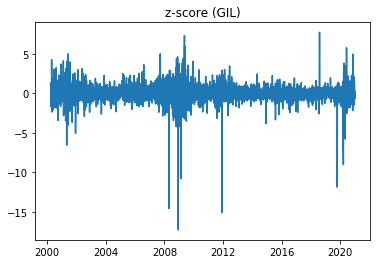

In [5]:
##Check if there is a data error in some stocks or there is some economic factor
##plot z score for GIL
from scipy import stats
plt.plot(r_d.index,stats.zscore(r_d["GIL"]))
plt.title('z-score (GIL)')

In [6]:
##plot the stocks which shas standard deviation of more than 10 

def print_z(r,d,p):
    z=stats.zscore(r)
    tickers=r.agg(['mean']).T.index
    
    counter=0
    for i in tickers:
        print(i)
        x=r.index
        y=z[:,counter]
        
        filter=np.abs(y)>d
        plt.scatter(x[filter],y[filter])
        plt.pause(p)
        counter+=1

AEM


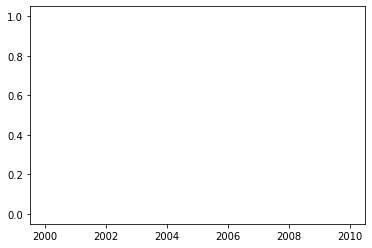

BCE


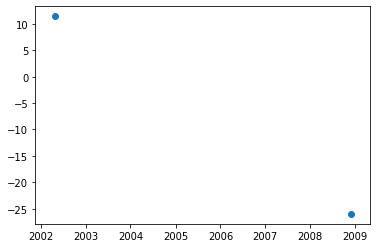

BMO


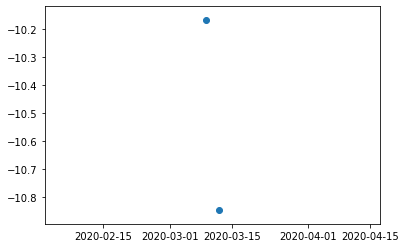

BNS


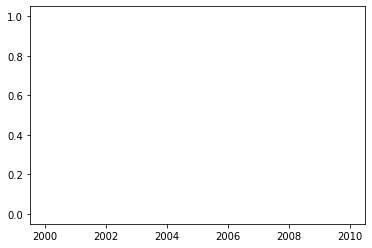

BHC


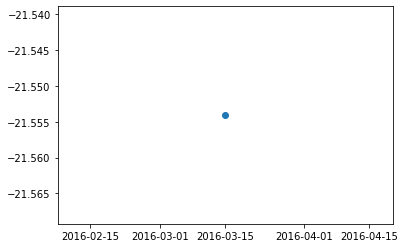

CM


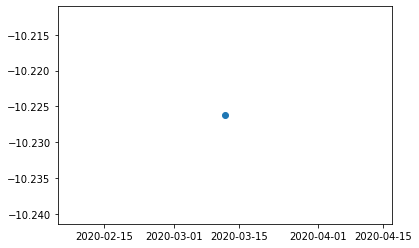

CNR


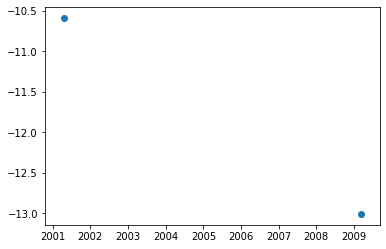

CP


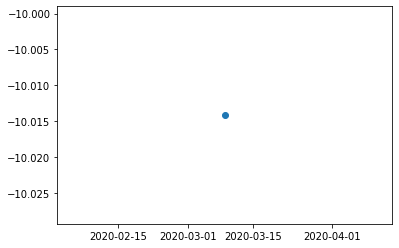

CSU


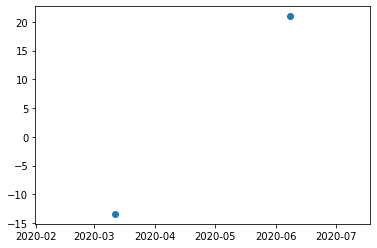

ENB


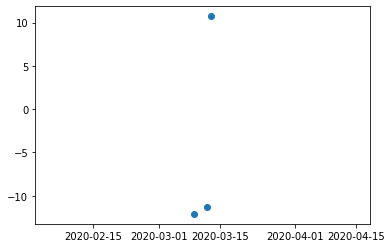

GIL


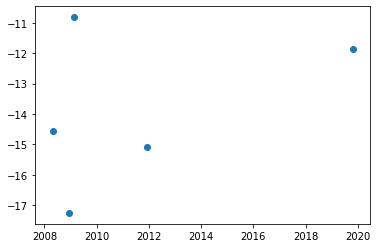

IMO


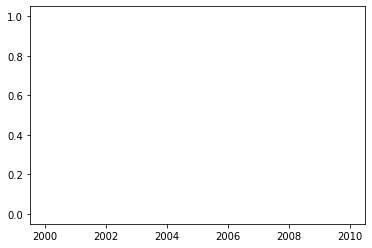

K


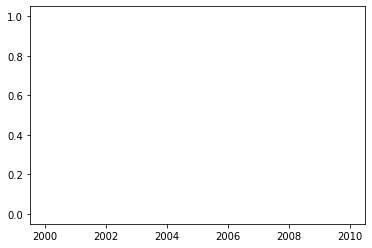

L


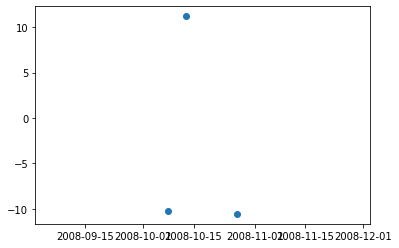

MFC


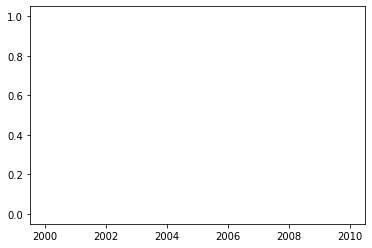

OTEX


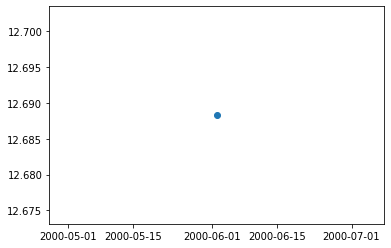

PPL


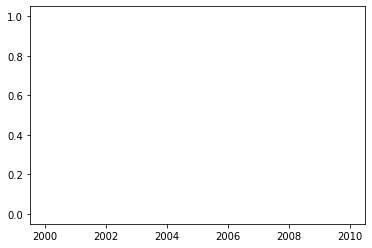

RY


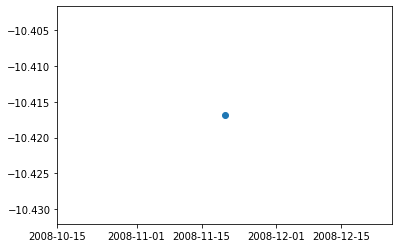

SAP


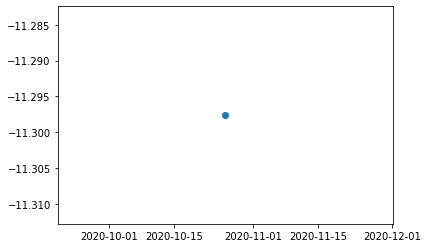

SLF


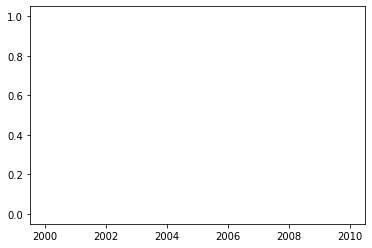

SU


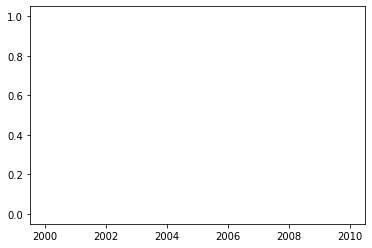

TRP


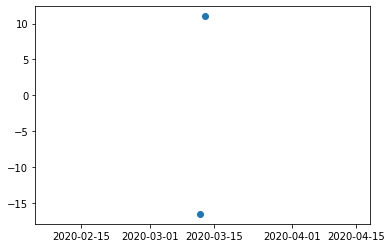

T


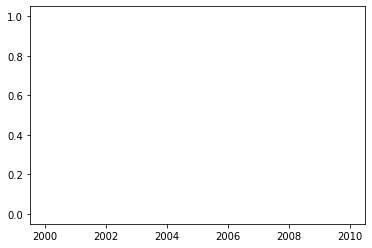

TD


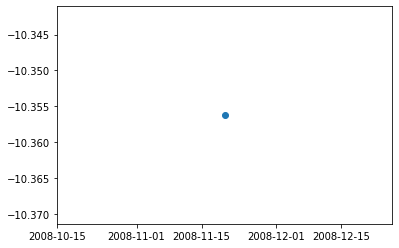

WCN


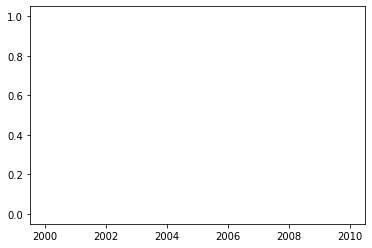

In [7]:
print_z(r_d,10,1)

In [7]:
##2008 and 2020 volatility can be associated with financial crisis and covid impact respectively
##for BHC, there was crisis in 2015 because of some controversies (detailed link :https://www.fool.com/investing/general/2016/01/08/why-valeant-pharmaceuticls-crashed-in-2015.aspx)
###GIL seems to be skewed towards left, lets check the annual volatility for GIL
r_d['GIL'].std()*np.sqrt(252)

0.3984410900049244

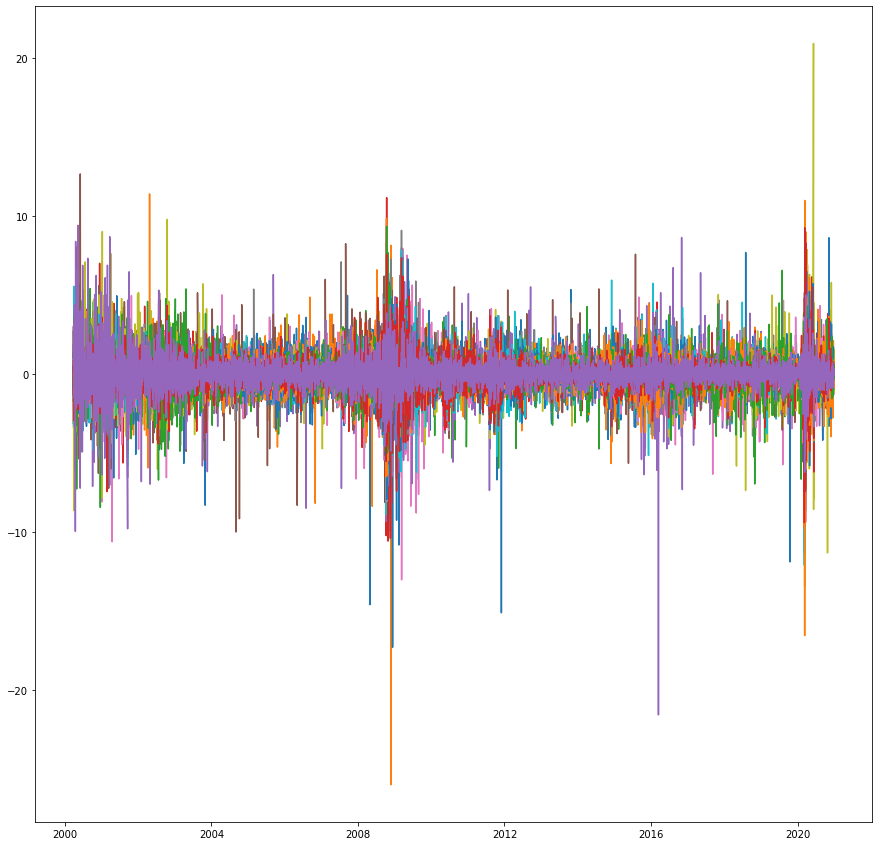

In [17]:
##plot z scores of all canadian blue chip stocks
plt.figure(figsize=(15,15))
plt.plot(r_d.index,stats.zscore(r_d))

In [4]:
##we can see financial crisis of 2008-2009, BHC impact in 2016 and covid crisis
##average return vs standard deviation of canadian blue chip stocks
InvOpp=r_d.agg(['mean','std']).T
#annualise, number of trading days is 252
InvOpp['mean']=InvOpp['mean']*252
InvOpp['std']=InvOpp['std']*np.sqrt(252)
InvOpp

,mean,std
AEM,0.125314,0.488854
BCE,0.064586,0.254559
BMO,0.114982,0.257973
BNS,0.121148,0.259665
BHC,0.012410,0.532458
CM,0.100570,0.271633
CNR,-0.112613,0.576694
CP,0.186305,0.307487
CSU,-0.071500,0.567639
ENB,0.129702,0.258855


In [26]:
##we can see CSU and CNR has the highest volatility (57%)

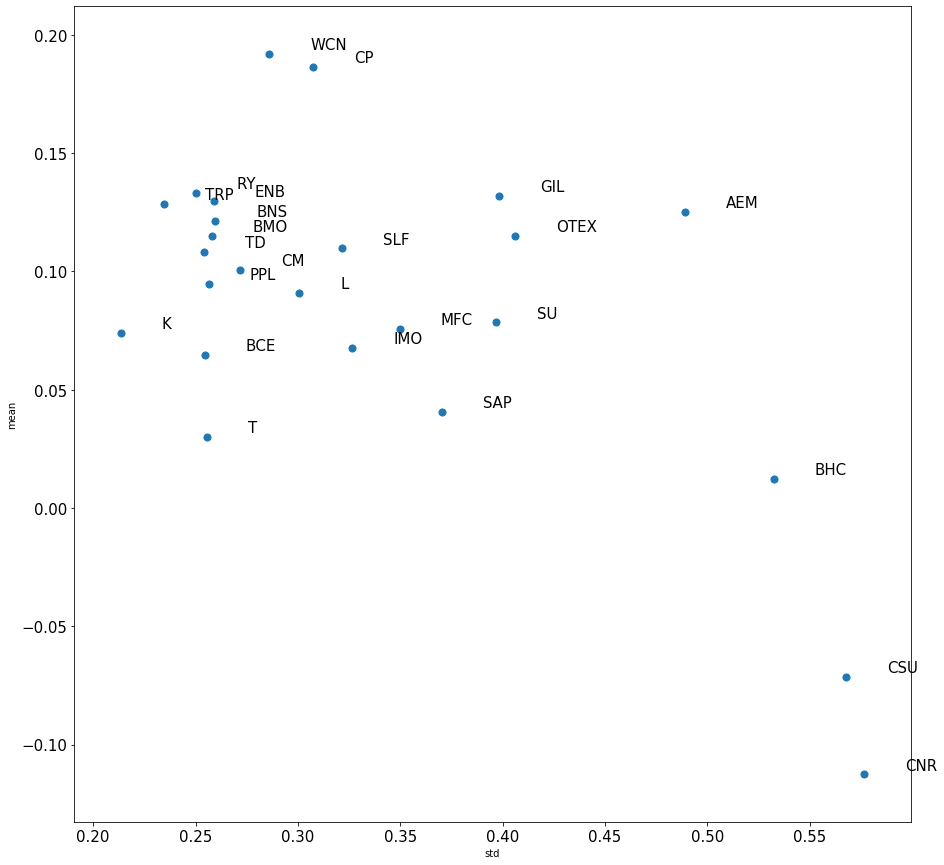

In [28]:
#plot
InvOpp.plot(kind='scatter',x='std',y='mean',figsize=(15,15), s=50, fontsize=15)
for i in InvOpp.index:
    plt.annotate(i,xy=(InvOpp.loc[i,'std']+0.02,InvOpp.loc[i,'mean']+0.002),size=15)

In [5]:
# the data seems to be correct, lets see Market portfolio and Diversification
#equal weight portfolio and 1/N(overall) in InvOpp
w_eqv=[1/r_d.shape[1] for i in range(r_d.shape[1])]
r_d['1/N']=r_d.dot(w_eqv)

In [10]:
r_d

,AEM,BCE,BMO,BNS,BHC,CM,CNR,CP,CSU,ENB,...,PPL,RY,SAP,SLF,SU,TRP,T,TD,WCN,1/N
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-24,-0.010257,0.029726,0.023445,0.000000,-0.005229,0.051907,0.019355,-0.018869,0.033902,0.000000,...,0.014993,0.017346,0.022072,-0.006689,0.008257,-0.007968,-0.012996,0.014151,0.034686,0.009479
2000-03-27,-0.020834,0.021615,-0.027101,0.000000,-0.006575,-0.053489,-0.035776,0.006329,0.000000,0.000000,...,-0.008969,-0.010638,0.014173,-0.013514,0.013072,-0.008032,0.004351,-0.021303,0.011299,-0.006684
2000-03-28,0.010471,-0.008682,-0.001834,0.000000,-0.006618,0.000000,0.013158,-0.022330,0.000000,0.000000,...,-0.033591,-0.013459,-0.045732,0.000000,0.008084,-0.008097,-0.016047,0.009525,0.022223,-0.007162
2000-03-29,-0.075712,-0.031704,0.005490,0.000000,-0.067287,-0.008830,0.000000,0.019170,-0.016807,0.006270,...,0.015409,0.008097,-0.200863,0.020203,0.041015,0.009967,-0.005900,0.009434,0.058684,-0.007070
2000-03-30,-0.022729,-0.070652,0.019874,0.038741,-0.135156,0.028418,-0.009852,0.084900,-0.126294,0.000000,...,0.018182,0.038238,-0.017095,0.113329,0.078734,-0.016667,-0.014903,0.018605,-0.005195,0.000266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.007019,0.005629,0.002506,0.004121,0.004450,0.013445,0.004032,0.009308,-0.030537,0.002800,...,0.004099,0.004652,0.000476,0.005724,-0.004667,0.006553,-0.002089,0.006440,0.002565,0.002770
2020-12-28,-0.010547,-0.002576,0.000132,0.000934,-0.020434,-0.019780,-0.046328,0.002176,0.003868,-0.012190,...,0.013299,-0.000733,0.037752,0.002281,-0.002928,-0.012658,-0.004892,-0.000714,-0.000394,-0.003036
2020-12-29,0.006201,0.000937,-0.001054,0.001680,0.002514,-0.000935,-0.003166,0.006096,-0.015565,0.000943,...,0.001833,0.002929,-0.007360,0.000228,-0.011799,0.005862,-0.000350,0.004451,0.000296,-0.000059


In [6]:
#lets see portfolio again including 1/N
InvOpp=r_d.agg(['mean','std']).T
InvOpp['mean']=InvOpp['mean']*252
InvOpp['std']=InvOpp['std']*np.sqrt(252)

In [12]:
InvOpp

,mean,std
AEM,0.125314,0.488854
BCE,0.064586,0.254559
BMO,0.114982,0.257973
BNS,0.121148,0.259665
BHC,0.012410,0.532458
CM,0.100570,0.271633
CNR,-0.112613,0.576694
CP,0.186305,0.307487
CSU,-0.071500,0.567639
ENB,0.129702,0.258855


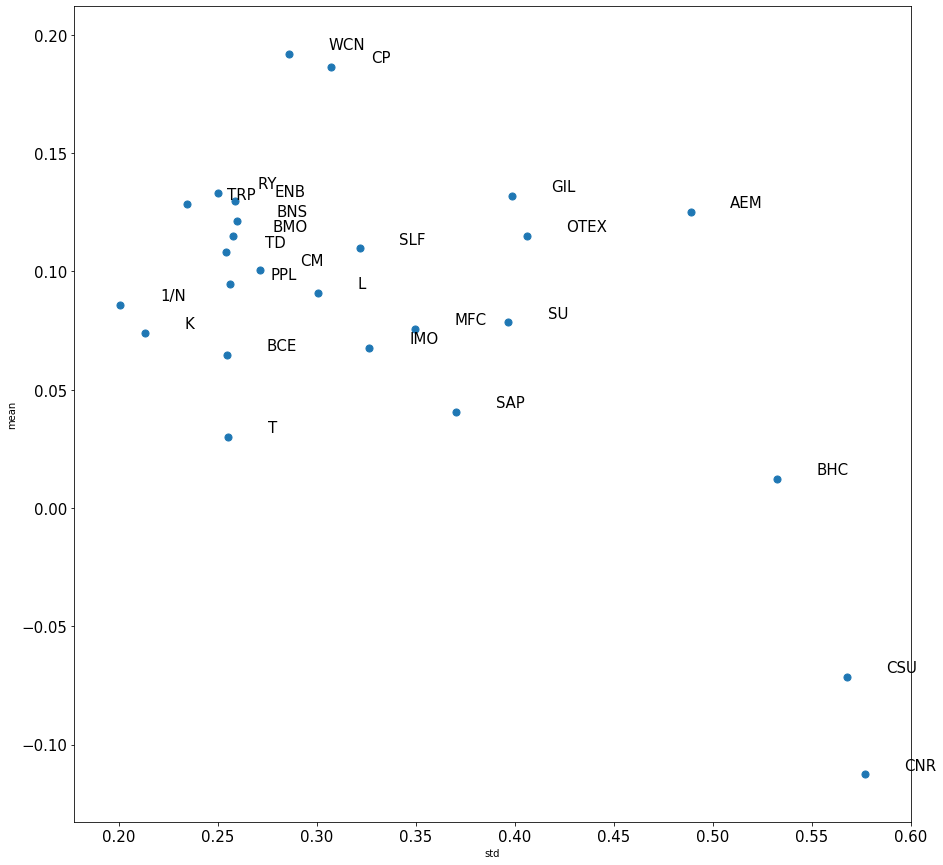

In [13]:
#overall volatility of the portfolio is around 20%
InvOpp.plot(kind='scatter',x='std',y='mean',figsize=(15,15), s=50, fontsize=15)
for i in InvOpp.index:
    plt.annotate(i,xy=(InvOpp.loc[i,'std']+0.02,##InvOpp.loc[i,'mean']+0.002),size=15)

In [23]:
##points we can make from above chart
#1. if we invest in this portfolio (TSX 60), volatility shrink because correlation seems to be less than 1
#2. example: some of the risk that TRP might not effect T, so after putting together risk get diversified
#3. Overall portfolio return is near 8% which looks near to average firm earned
#4. overall volatility(20%) is less then the average volatility i.e. 33%
#5. if we invest in avaerge return then we loose volatility i.e 20#% which is we want 
InvOpp.describe()

,mean,std
count,26.000000,26.000000
mean,0.085665,0.330669
std,0.066675,0.107803
min,-0.112613,0.200972
25%,0.069186,0.255735
50%,0.097659,0.293363
75%,0.124273,0.390105
max,0.192024,0.576694


In [7]:
#Finally GLS regression
#average return will be our dependent variable and and standard deviation will be independent variable
import statsmodels.api as sm
x=InvOpp['std']
# add slope
x=sm.add_constant(x)

y=InvOpp['mean']
GLS_mu_sigma=sm.GLS(y,x)
Fit_mu_sigma=GLS_mu_sigma.fit()

In [25]:
#let see functions of Fit_mu_sigma
dir(Fit_mu_sigma)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',
 'n

In [26]:
print(Fit_mu_sigma.summary())

                            GLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.381
Model:                            GLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     14.78
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           0.000780
Time:                        22:19:39   Log-Likelihood:                 40.262
No. Observations:                  26   AIC:                            -76.52
Df Residuals:                      24   BIC:                            -74.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2119      0.034      6.146      0.0

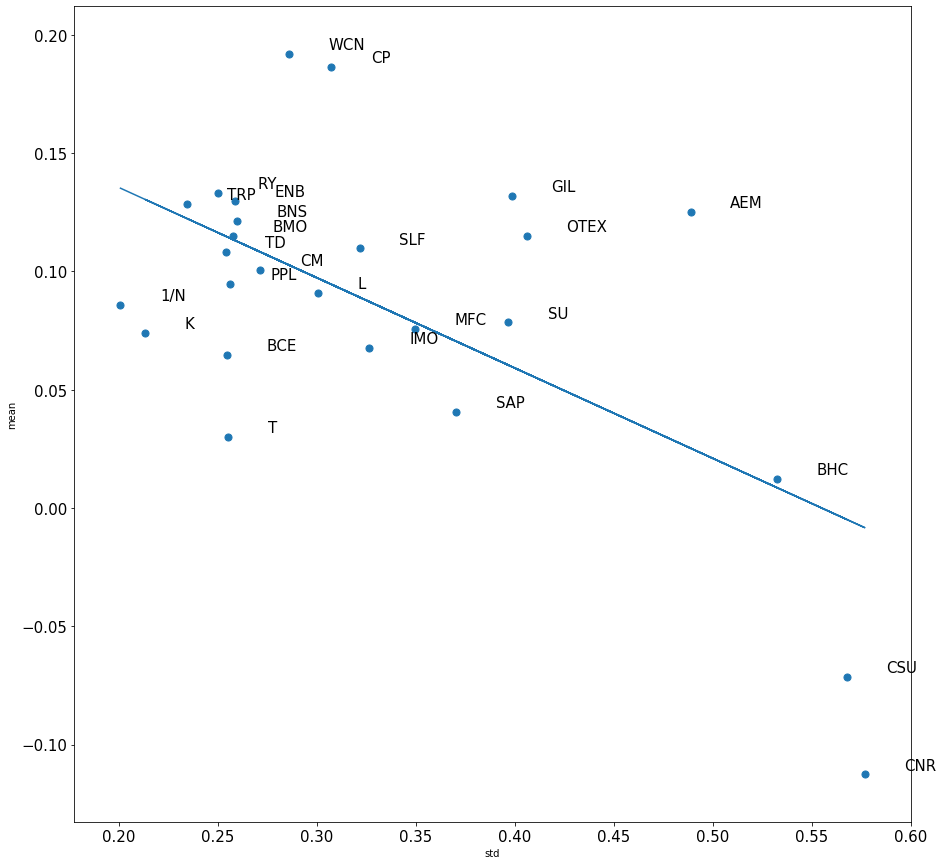

In [27]:
#lets plot the graph and add the linear regression (GLS) line

InvOpp.plot(kind='scatter',x='std',y='mean',figsize=(15,15), s=50, fontsize=15)
for i in InvOpp.index:
    plt.annotate(i,xy=(InvOpp.loc[i,'std']+0.02,InvOpp.loc[i,'mean']+0.002),size=15)
 
plt.plot(InvOpp['std'],Fit_mu_sigma.predict())
plt.show()

In [28]:
##As per the data if we take more risk then we get low return 
## there is a negatibve relationship
###low volatility and high return (i.e low volatilty anomaly (https://en.wikipedia.org/wiki/Low-volatility_anomaly))

**Total Risk = Systematic risk+Ideosyncratic risk**


In [29]:
#now lets see what happens with systematic risk or Ideosyncratic risk or beta
##Systematic risk is non-diversified and Ideosyncrtic risk is diversified
#Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry
#Systematic risk is just the covariance risk

In [8]:
InvOpp['Total.Risk']=InvOpp['std']**2
InvOpp['Corr_1/N']=r_d.corr().iloc[:,r_d.shape[1]-1]

In [9]:
InvOpp['system.Risk']=InvOpp['std'].iloc[InvOpp.shape[0]-1]*InvOpp['std']*InvOpp['Corr_1/N']

In [10]:
#beta indicates how volatile stock price is in comparison to the overall stock market
InvOpp['Beta']=InvOpp['system.Risk']/InvOpp['system.Risk'].loc['1/N']
InvOpp['Ideosync.Risk']=InvOpp['Total.Risk']-InvOpp['system.Risk']

In [34]:
InvOpp
#Beta>1, stock price is more volatile than market, Beta<1 stock price is less volatile as compared to market

,mean,std,Total.Risk,Corr_1/N,system.Risk,Beta,Ideosync.Risk
AEM,0.125314,0.488854,0.238978,0.308668,0.030325,0.750816,0.208652
BCE,0.064586,0.254559,0.064800,0.541830,0.027720,0.686303,0.037081
BMO,0.114982,0.257973,0.066550,0.801926,0.041576,1.029371,0.024974
BNS,0.121148,0.259665,0.067426,0.771693,0.040271,0.997062,0.027155
BHC,0.012410,0.532458,0.283512,0.452617,0.048434,1.199168,0.235077
CM,0.100570,0.271633,0.073785,0.785706,0.042892,1.061958,0.030892
CNR,-0.112613,0.576694,0.332576,0.552458,0.064030,1.585291,0.268546
CP,0.186305,0.307487,0.094548,0.695691,0.042991,1.064405,0.051557
CSU,-0.071500,0.567639,0.322214,0.509543,0.058128,1.439185,0.264085
ENB,0.129702,0.258855,0.067006,0.646420,0.033629,0.832599,0.033377


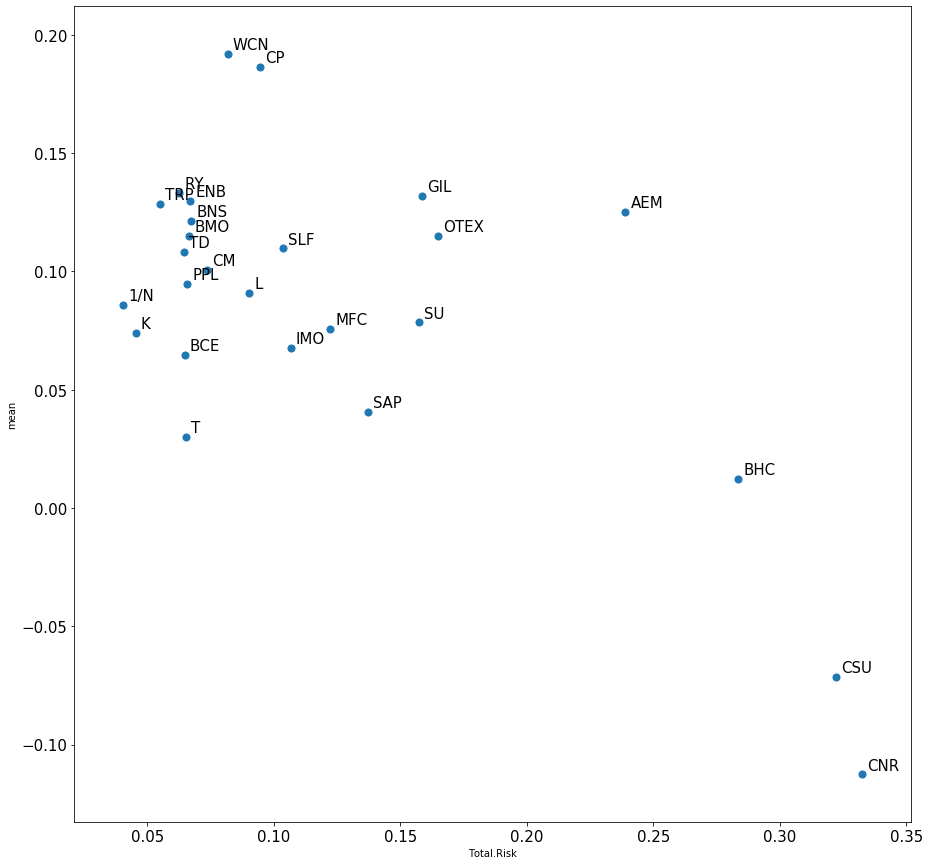

In [39]:
#plot
InvOpp.plot(kind='scatter',x='Total.Risk',y='mean',figsize=(15,15), s=50, fontsize=15)
for i in InvOpp.index:
    plt.annotate(i,xy=(InvOpp.loc[i,'Total.Risk']+0.002,InvOpp.loc[i,'mean']+0.002),size=15)
    
plt.show()

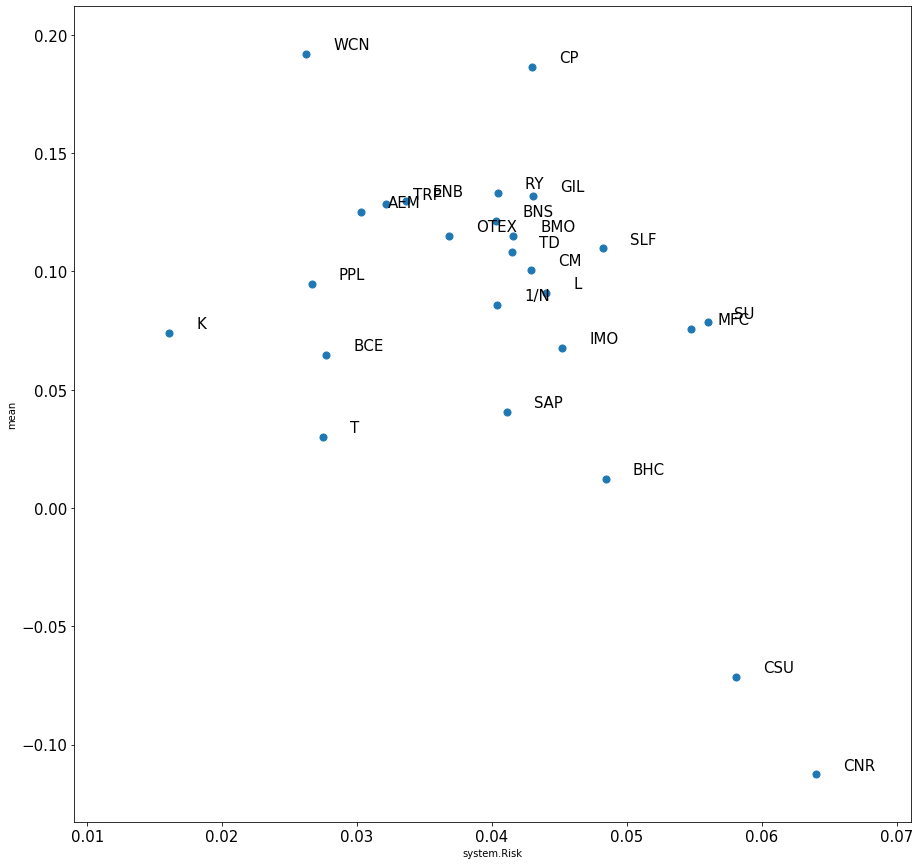

In [38]:
#plot systematic risk
InvOpp.plot(kind='scatter',x='system.Risk',y='mean',figsize=(15,15), s=50, fontsize=15)
for i in InvOpp.index:
    plt.annotate(i,xy=(InvOpp.loc[i,'system.Risk']+0.002,InvOpp.loc[i,'mean']+0.002),size=15)
    
plt.show()

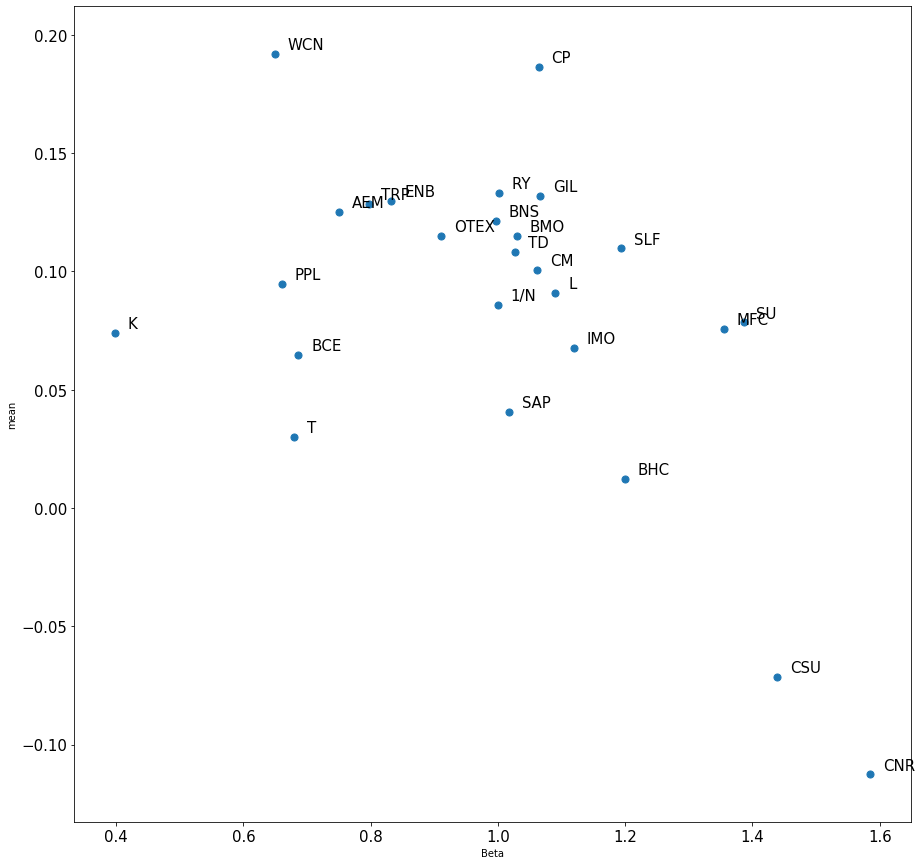

In [40]:
#data is dense in systematic risk so we might have high R square
#plot beta
InvOpp.plot(kind='scatter',x='Beta',y='mean',figsize=(15,15), s=50, fontsize=15)
for i in InvOpp.index:
    plt.annotate(i,xy=(InvOpp.loc[i,'Beta']+0.02,InvOpp.loc[i,'mean']+0.002),size=15)
    
plt.show()

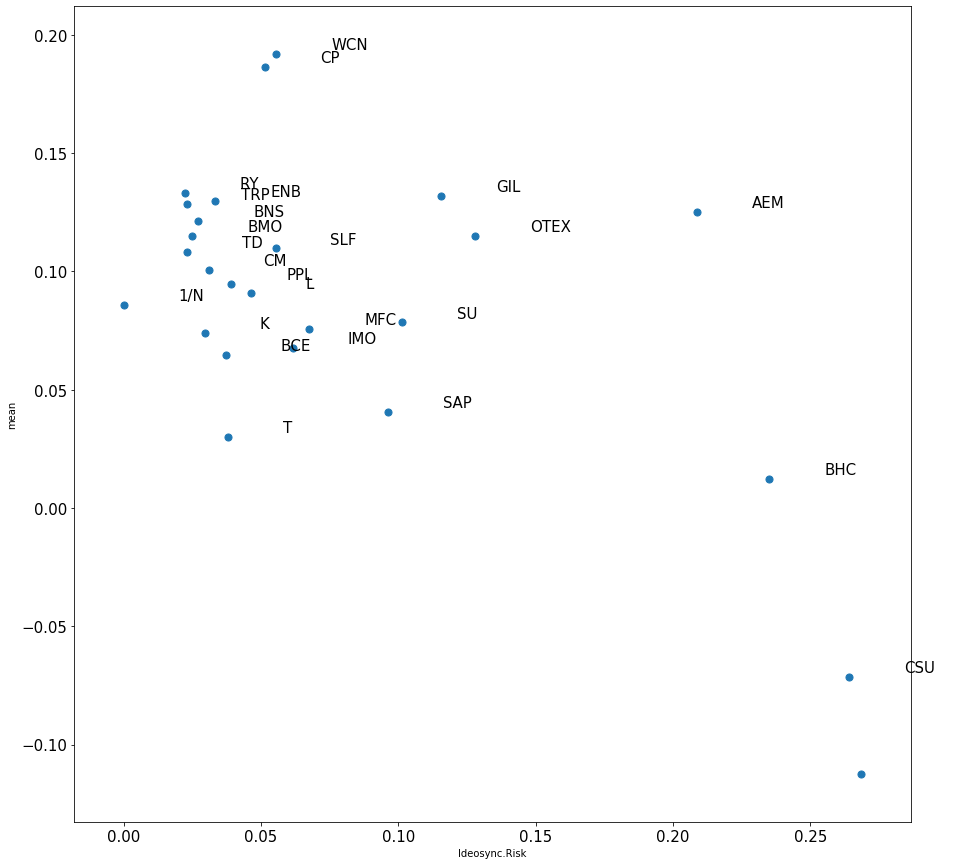

In [41]:
#1/N has a beta of 1
#plot ideosyn risk
InvOpp.plot(kind='scatter',x='Ideosync.Risk',y='mean',figsize=(15,15), s=50, fontsize=15)
for i in InvOpp.index:
    plt.annotate(i,xy=(InvOpp.loc[i,'Ideosync.Risk']+0.02,InvOpp.loc[i,'mean']+0.002),size=15)
    
plt.show()

In [42]:
#firm with high ideosyncratic risk tend to give lower return

In [11]:
#lets create CAPM regression model#
x=InvOpp['Beta']
x=sm.add_constant(x)
y=InvOpp['mean']
GLS_mu_Beta=sm.GLS(y,x)
Fit_mu_Beta=GLS_mu_Beta.fit()
print(Fit_mu_Beta.summary())

                            GLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.254
Model:                            GLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     8.153
Date:                Sat, 11 Sep 2021   Prob (F-statistic):            0.00873
Time:                        10:27:48   Log-Likelihood:                 37.825
No. Observations:                  26   AIC:                            -71.65
Df Residuals:                      24   BIC:                            -69.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2086      0.045      4.681      0.0

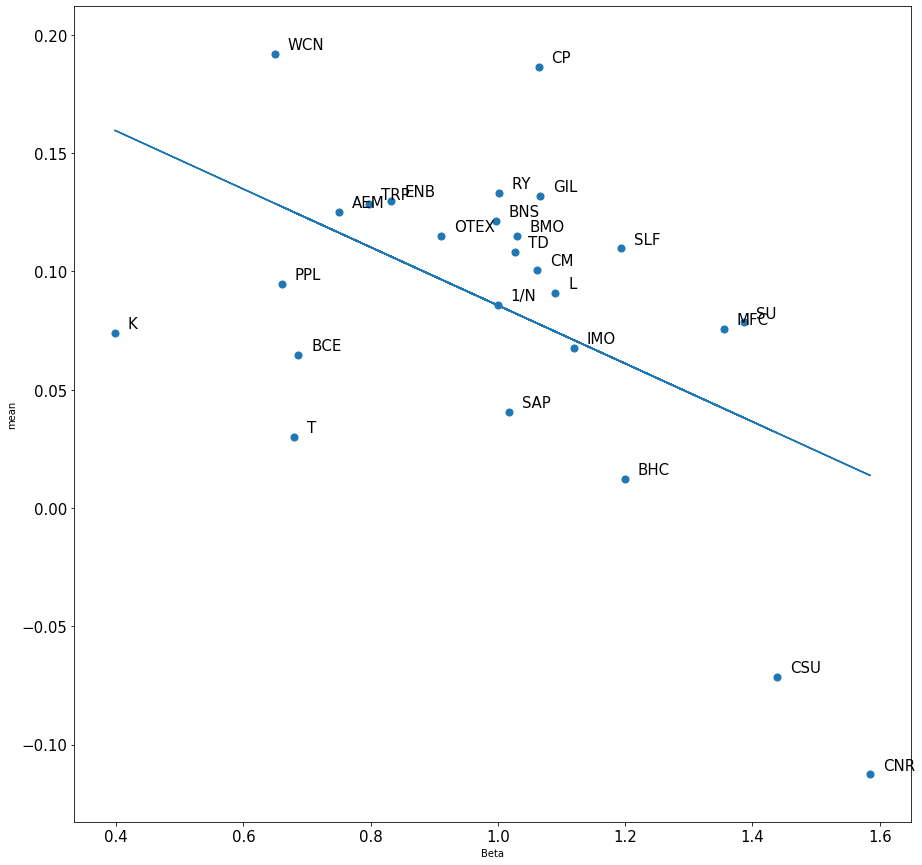

In [17]:
#plot
InvOpp.plot(kind='scatter',x='Beta',y='mean',figsize=(15,15), s=50, fontsize=15)
for i in InvOpp.index:
    plt.annotate(i,xy=(InvOpp.loc[i,'Beta']+0.02,InvOpp.loc[i,'mean']+0.002),size=15)
 
plt.plot(InvOpp['Beta'],Fit_mu_Beta.predict())
plt.show()

In [12]:
#WCN overperformed relative to systematic risk

**SKewness and Kurtosis(realized, cross-sectional)**

(array([1., 1., 1., 0., 0., 3., 9., 8., 2., 1.]),
 array([-3.46259275, -3.01507722, -2.56756168, -2.12004614, -1.67253061,
        -1.22501507, -0.77749953, -0.329984  ,  0.11753154,  0.56504708,
         1.01256262]),
 <a list of 10 Patch objects>)

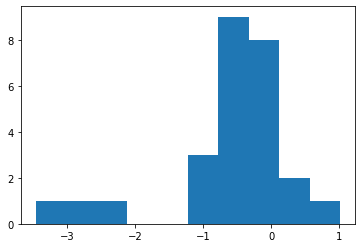

In [19]:
##Kurtosis - Describe distribution around average, Skewness - a measure of the symmetry of a distribution
##we will use Kurtosis and skewness to find if the returns follow gaussian distribution
from scipy import stats
plt.hist(stats.skew(r_d))

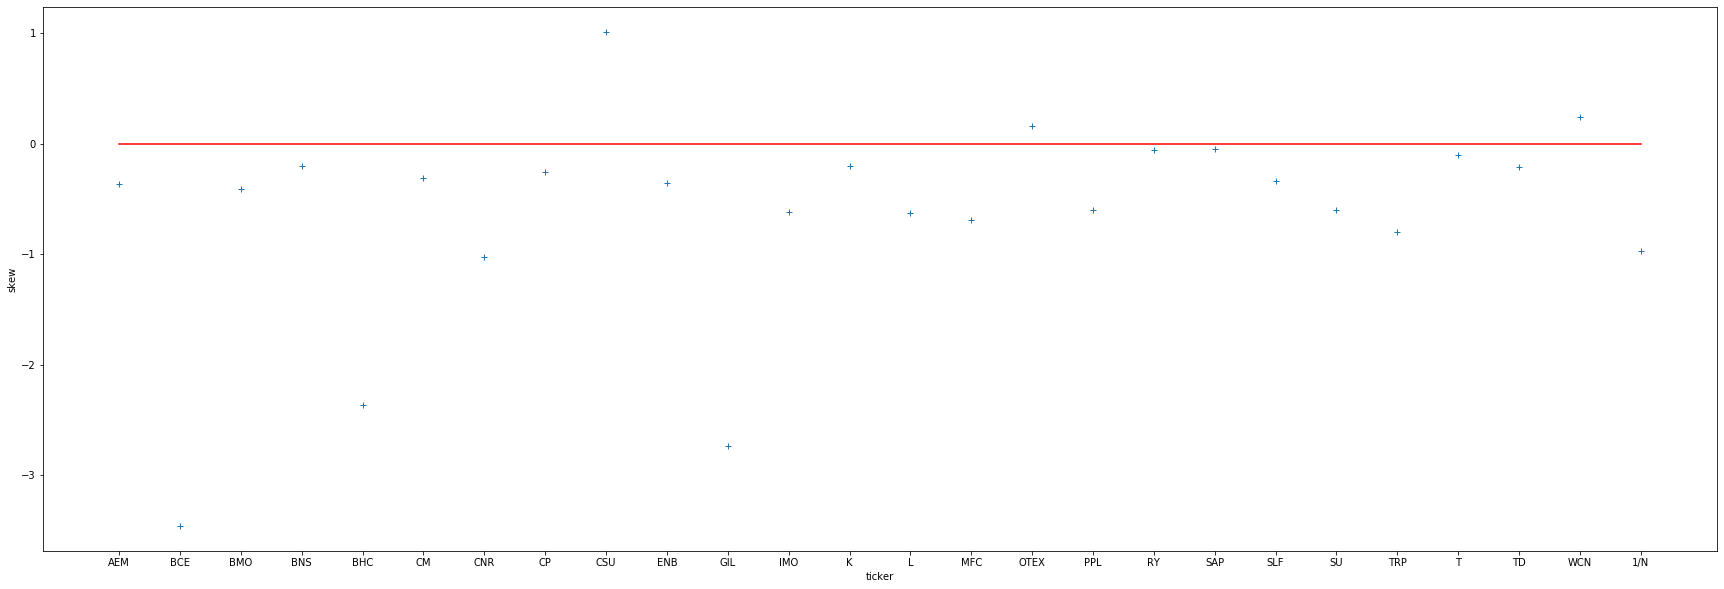

In [23]:
# figure: skew vs tickers
plt.figure(figsize=(30,10))
plt.plot(r_d.columns,stats.skew(r_d),'+')
plt.plot(r_d.columns,0*np.ones((r_d.shape[1],1)),'r')
plt.ylabel('skew')
plt.xlabel('ticker')
plt.show()

In [28]:
##we can see in above graph that most of the stocks are negatively skewed and the overall market(1/N) is also negatively skewed
##Negatively skewed generally means frequesnt small gain and few large losses(Example : Covid and financial crisis)
##Gaussian distribution has a skewness of 0

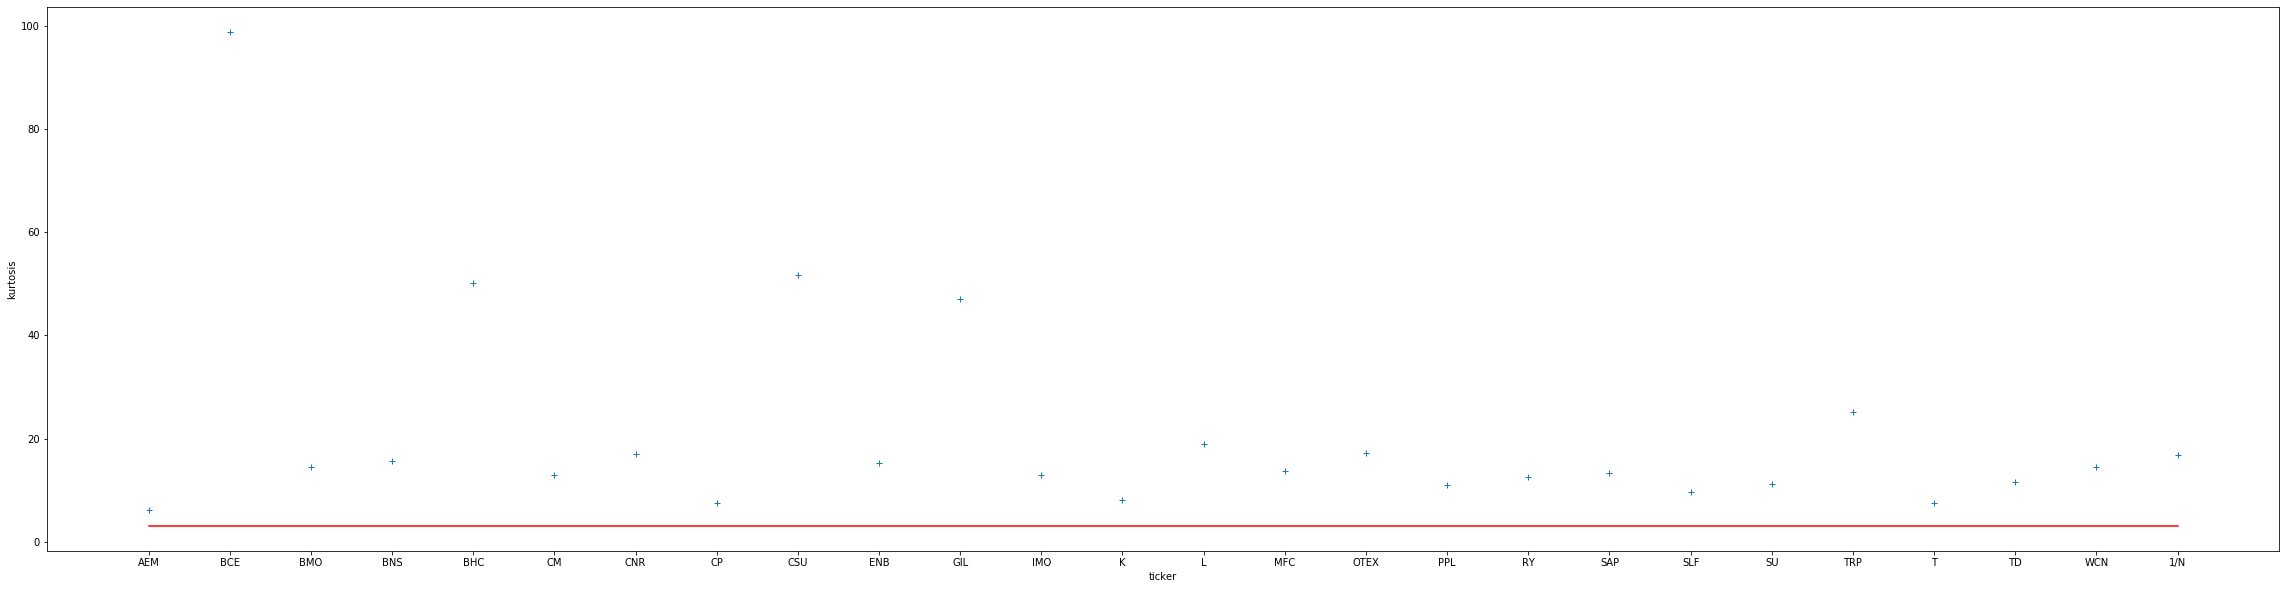

In [29]:
# figure: kurtosis vs tickers

plt.figure(figsize=(40,10))
plt.plot(r_d.columns,stats.kurtosis(r_d),'+')
plt.plot(r_d.columns,3*np.ones((r_d.shape[1],1)),'r')
plt.ylabel('kurtosis')
plt.xlabel('ticker')
plt.show()

In [30]:
##Kurtosis describe distribution aroun mean
#Gaussian distribution has a Kurtosis of 3

In [31]:
#lets try to variation in data based on low dimension representation(PCA - Principal Component Analysis)

** Factor Analysis**

Text(0, 0.5, 'cumsum(variance Explained)')

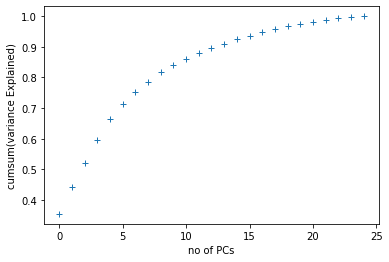

In [34]:
#We will try to find how many Principal components are requeried to understand most of the variation
from sklearn.decomposition import PCA
pca_r_d=PCA().fit(r_d.iloc[:,0:r_d.shape[1]-1])
plt.plot(np.cumsum(pca_r_d.explained_variance_ratio_),'+')
plt.xlabel('no of PCs')
plt.ylabel('cumsum(variance Explained)')

In [35]:
pca_r_d.explained_variance_ratio_

array([0.35450542, 0.08761077, 0.08014906, 0.07516861, 0.06753942,
       0.04952003, 0.03832465, 0.0340141 , 0.03018142, 0.02476964,
       0.01965757, 0.01812739, 0.01601653, 0.0147815 , 0.01373521,
       0.0126427 , 0.01122693, 0.01068211, 0.00963677, 0.00774491,
       0.00613462, 0.00586932, 0.0046287 , 0.00384861, 0.00348403])

In [66]:
#so it means PC1 can explain 35% of the variation in the data, so lets take it
pca=PCA(n_components=1)
pca.fit(r_d.iloc[:,0:r_d.shape[1]-1])

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [67]:
pc1=pca.transform(r_d.iloc[:,0:r_d.shape[1]-1])
pc1.shape

(5227, 1)

Text(0.5, 1.0, 'time series of pc6(daily reurns of TSX60 constituents)')

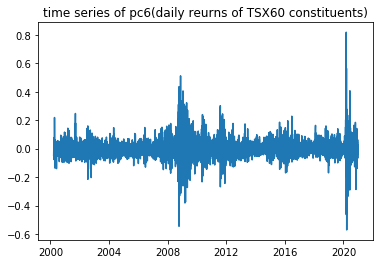

In [68]:
plt.plot(r_d.index,pc1)
plt.title('time series of pc6(daily reurns of TSX60 constituents)')

** lets see similarity between PC6 and equal weight portfolio**

In [69]:
x=stats.zscore(r_d['1/N'])
x=sm.add_constant(x)
y=stats.zscore(pc1) 

In [70]:
GLS_pc1_eqw=sm.GLS(y,x)
Fit_pc1_eqw=GLS_pc1_eqw.fit()

In [71]:
print(Fit_pc1_eqw.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            GLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.065e+05
Date:                Sat, 11 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:39:23   Log-Likelihood:                 3996.0
No. Observations:                5227   AIC:                            -7988.
Df Residuals:                    5225   BIC:                            -7975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.414e-17      0.002   3.47e-14      1.0

In [72]:
#1/N or overall portfolio conincide with PC1 with R square close to 1,so this is a very good fit